<a href="https://colab.research.google.com/github/Aravind863/datascience-assignments/blob/main/SVM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Collection and Preprocessing
data = pd.read_csv('mushroom.csv')

In [2]:
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into features and labels
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Step 2 & 3: Selecting the Kernel Function and Tuning Hyperparameters using Randomized Search
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [ ]:
svm = SVC()
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5, verbose=2)
random_search.fit (X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  22.1s
[CV] END ........................C=1, gamma=1, k

In [6]:
# Step 4: Training the SVM Model
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [7]:
# Step 5: Model Evaluation
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

      edible       1.00      0.65      0.79       133
   poisonous       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [8]:
!pip install yellowbrick

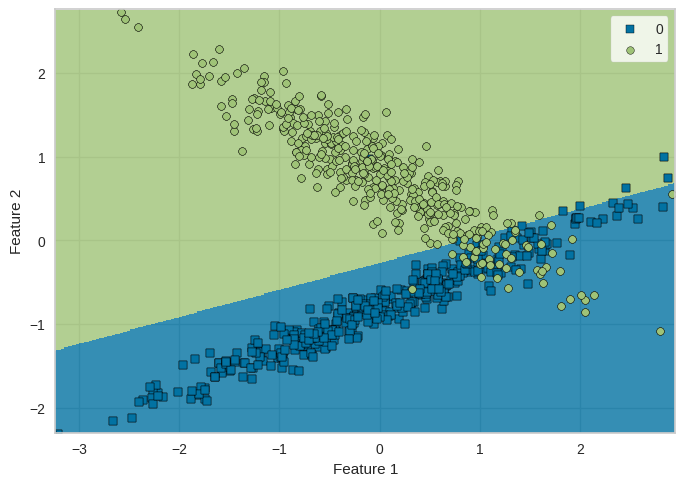

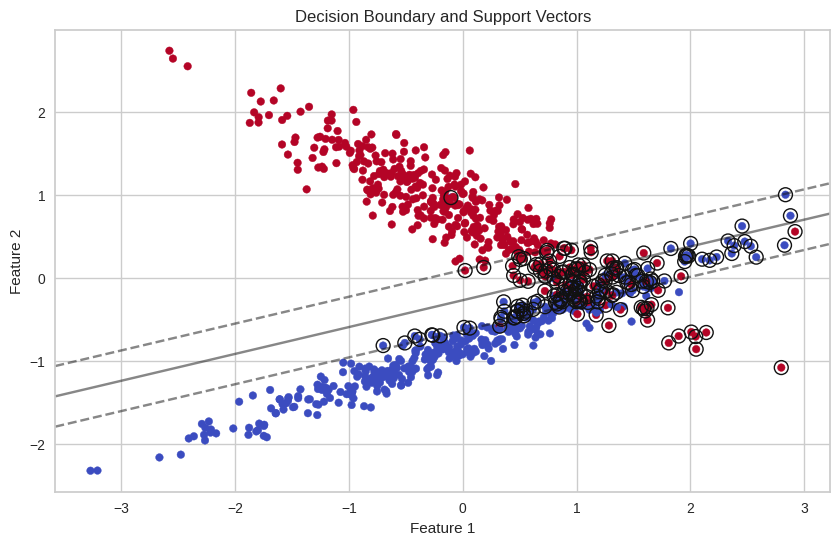

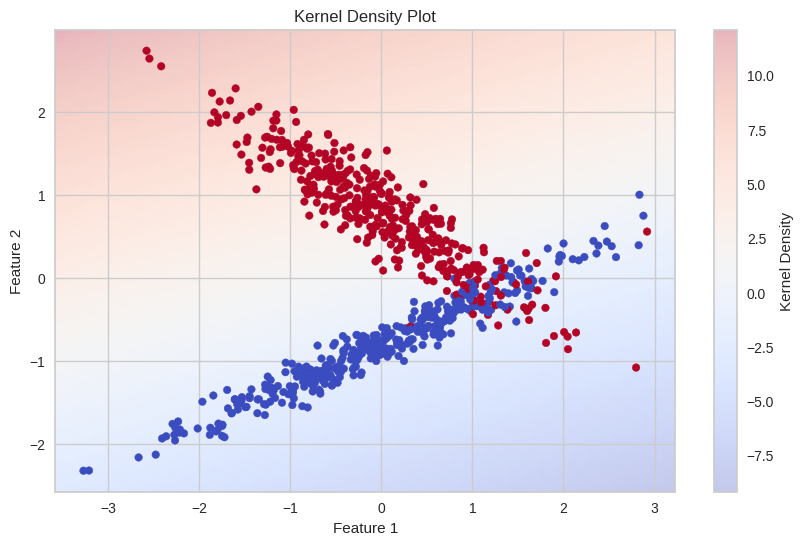

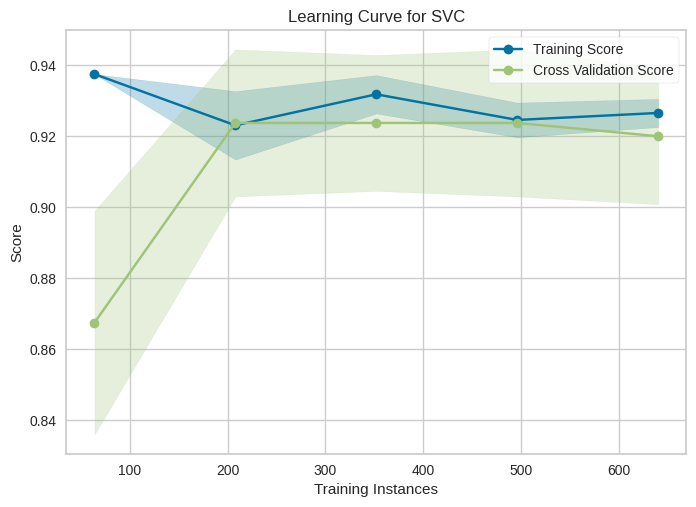

Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       104
           1       0.99      0.85      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.model_selection import LearningCurve
from yellowbrick.contrib.classifier import DecisionViz

# Step 1: Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_scaled, y_train)

# Step 5: Visualize the Decision Boundary and Support Vectors
viz = DecisionViz(svm, title="Decision Boundary and Support Vectors", features=["Feature 1", "Feature 2"])
viz.fit(X_train_scaled, y_train)
viz.draw(X_train_scaled, y_train)
viz.show()

# Step 6: Visualize the Margin
def plot_decision_boundary(X, y, svm_model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("Decision Boundary and Support Vectors")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_train_scaled, y_train, svm)

# Step 7: Visualize the Kernel Density
def plot_kernel_density(X, y, svm_model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto', origin='lower', cmap=plt.cm.coolwarm, alpha=0.3)
    plt.colorbar(label='Kernel Density')
    plt.title("Kernel Density Plot")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_kernel_density(X_train_scaled, y_train, svm)

# Step 8: Visualize Learning Curve
visualizer = LearningCurve(svm, scoring='accuracy', train_size=np.linspace(0.1, 1.0, 10))
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

# Step 9: Evaluate Model
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))